# Data analysis of HR and Employees.

In [1]:
# Import libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('HR_Dataset.csv', encoding='unicode_escape')

Basic informations about the dataset

In [3]:
df

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,2010-08-31,"Casefurt, Serbia",3,14,Active,Remote,657648
1999996,1999996,EMP1999997,Tracey Smith,IT,Software Engineer,2021-05-07,"Dannyport, Kuwait",3,4,Active,On-site,1030109
1999997,1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,2024-05-29,"Craighaven, Nigeria",5,1,Active,Remote,1313085
1999998,1999998,EMP1999999,Michael Roberson,IT,Software Engineer,2023-02-14,"Jonathanmouth, Djibouti",4,2,Retired,On-site,1479727


In [4]:
df.shape

(2000000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [6]:
# Check for null values
pd.isnull(df).sum()

Unnamed: 0            0
Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

In [7]:
# Removing unwanted column from the dataframe

df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082
...,...,...,...,...,...,...,...,...,...,...,...
1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,2010-08-31,"Casefurt, Serbia",3,14,Active,Remote,657648
1999996,EMP1999997,Tracey Smith,IT,Software Engineer,2021-05-07,"Dannyport, Kuwait",3,4,Active,On-site,1030109
1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,2024-05-29,"Craighaven, Nigeria",5,1,Active,Remote,1313085
1999998,EMP1999999,Michael Roberson,IT,Software Engineer,2023-02-14,"Jonathanmouth, Djibouti",4,2,Retired,On-site,1479727


In [9]:
# Change the data-tpye of "Hire_Date" object to date 

df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])
df['Hire_Date'].dtypes

dtype('<M8[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Employee_ID         object        
 1   Full_Name           object        
 2   Department          object        
 3   Job_Title           object        
 4   Hire_Date           datetime64[ns]
 5   Location            object        
 6   Performance_Rating  int64         
 7   Experience_Years    int64         
 8   Status              object        
 9   Work_Mode           object        
 10  Salary_INR          int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 167.8+ MB


In [11]:
# About "Performance_Rating" column
df['Performance_Rating'].unique()

array([5, 2, 1, 4, 3])

In [12]:
df['Performance_Rating'].value_counts()

Performance_Rating
4    400529
2    400174
3    399814
1    399756
5    399727
Name: count, dtype: int64

In [13]:
# About "Experience_Years" Column
df['Experience_Years'].unique()

array([14,  7,  2,  1,  0,  4,  9,  5,  6,  8,  3, 10, 11, 12, 13, 15])

In [14]:
df['Experience_Years'].value_counts()

Experience_Years
3     200522
2     199924
4     199866
1     199162
0     198775
6     160410
9     160223
8     160212
5     160112
7     159005
10     41209
13     40149
11     40146
14     40005
12     39709
15       571
Name: count, dtype: int64

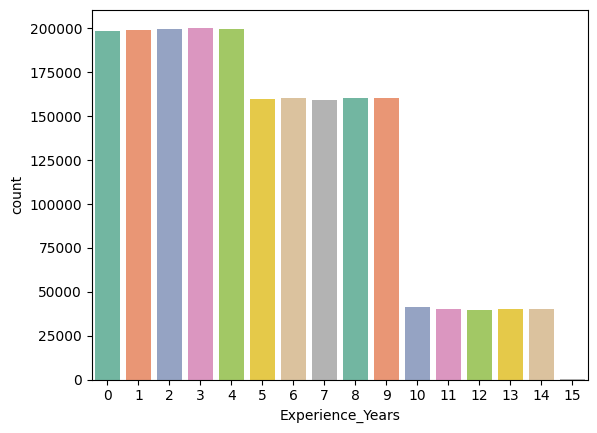

In [15]:
sns.countplot( x = 'Experience_Years', data = df, hue='Experience_Years', palette='Set2', legend=False)

plt.show()

In [16]:
# Want to show the "Object" columns only 
df.select_dtypes( include = 'object')

,Employee_ID,Full_Name,Department,Job_Title,Location,Status,Work_Mode
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,"Isaacland, Denmark",Resigned,On-site
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,"Anthonyside, Costa Rica",Active,On-site
2,EMP0000003,Alyssa Martinez,HR,HR Manager,"Port Christinaport, Saudi Arabia",Active,On-site
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,"Port Shelbychester, Antigua and Barbuda",Active,On-site
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,"Lake Kimberly, Palestinian Territory",Active,On-site
...,...,...,...,...,...,...,...
1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,"Casefurt, Serbia",Active,Remote
1999996,EMP1999997,Tracey Smith,IT,Software Engineer,"Dannyport, Kuwait",Active,On-site
1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,"Craighaven, Nigeria",Active,Remote
1999998,EMP1999999,Michael Roberson,IT,Software Engineer,"Jonathanmouth, Djibouti",Retired,On-site


In [17]:
# Want to show the "Numeric" columns only 
df.select_dtypes( include = 'number')

,Performance_Rating,Experience_Years,Salary_INR
0,5,14,1585363
1,2,7,847686
2,1,2,1430084
3,1,1,990689
4,5,0,535082
...,...,...,...
1999995,3,14,657648
1999996,3,4,1030109
1999997,5,1,1313085
1999998,4,2,1479727


Exploratory Data Analysis (EDA)

Q.1) What is the distribution of Employee Status (Active, Resigned, Retired, Terminated) ?

In [18]:
status = df['Status'].value_counts()

In [19]:
status

Status
Active        1401558
Resigned       398660
Retired         99912
Terminated      99870
Name: count, dtype: int64

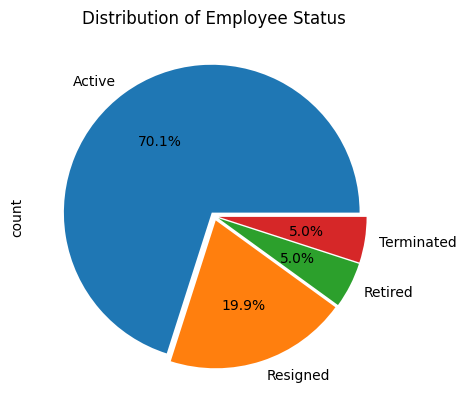

In [20]:
status.plot( kind = 'pie' , autopct= '%1.1f%%', explode=(0.03,0.03,0.03,0.03))

plt.title('Distribution of Employee Status')
plt.show()

Q.2) What is the distribution of work modes (On-site, Remote) ?

In [21]:
work_mode = df['Work_Mode'].value_counts()
work_mode

Work_Mode
On-site    1199109
Remote      800891
Name: count, dtype: int64

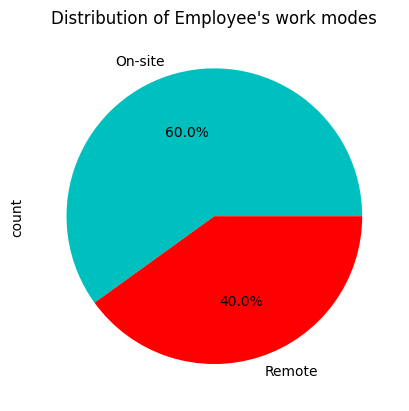

In [22]:
work_mode.plot( kind = 'pie' , colors = 'cr', autopct= '%1.1f%%')

plt.title("Distribution of Employee's work modes")
plt.show()

Q.3) How many employees are there in each department?

In [23]:
df['Department'].value_counts()

Department
IT            601042
Sales         400031
Operations    300095
Marketing     240081
Finance       199873
HR            159119
R&D            99759
Name: count, dtype: int64

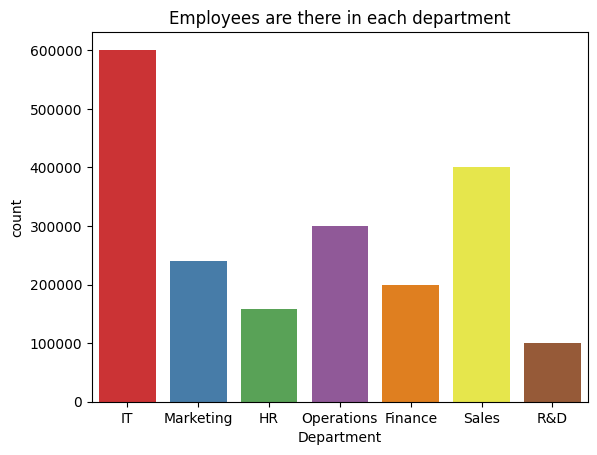

In [24]:
sns.countplot( x = 'Department', data = df, hue='Department', palette='Set1', legend=False)

plt.title('Employees are there in each department')
plt.show()

Q.4) How many employees are there in each Job_Tilte?

In [25]:
df['Job_Title'].value_counts()

Job_Title
Software Engineer                300358
Sales Executive                  199982
Operations Executive             150058
Data Analyst                     120375
Marketing Executive              120154
Account Manager                  119929
Accountant                       100307
DevOps Engineer                   90197
Logistics Coordinator             90188
HR Executive                      79348
SEO Specialist                    71692
Business Development Manager      60233
IT Manager                        60224
Financial Analyst                 59815
Research Scientist                50017
Talent Acquisition Specialist     47994
Supply Chain Manager              44935
Content Strategist                36154
CTO                               29888
Product Developer                 29872
Finance Manager                   29799
HR Manager                        23841
Sales Director                    19887
Operations Director               14914
Lab Technician                

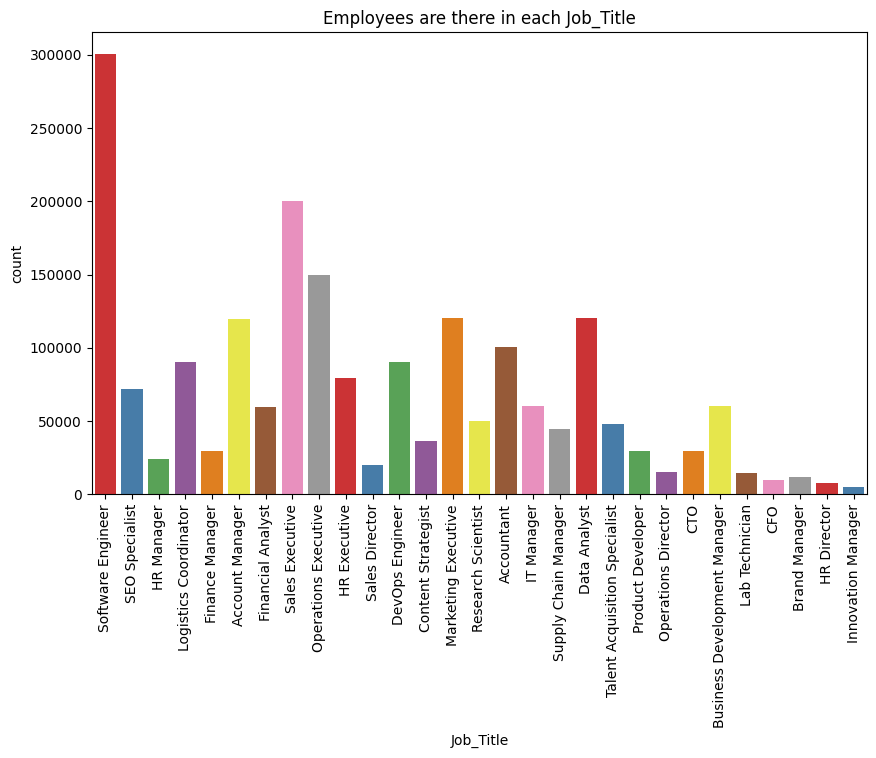

In [26]:
plt.figure(figsize=(10,6))
sns.countplot( x = 'Job_Title', data = df, hue='Job_Title', palette='Set1', legend=False)

plt.xticks( rotation = 'vertical')
plt.title('Employees are there in each Job_Title')
plt.show()

Q.5) What is the average salary by Department?

In [27]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084


In [28]:
dept = df.groupby('Department')['Salary_INR'].mean()

dept

Department
Finance       9.404117e+05
HR            7.438536e+05
IT            1.129858e+06
Marketing     7.699362e+05
Operations    7.546263e+05
R&D           8.003772e+05
Sales         7.929579e+05
Name: Salary_INR, dtype: float64

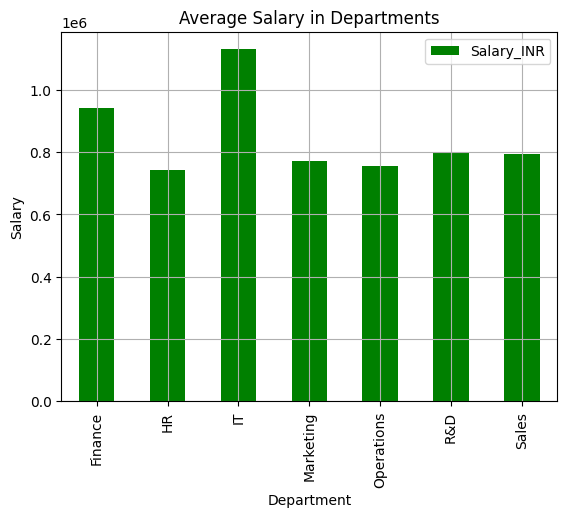

In [29]:
dept.plot( x = dept.index, y = dept.values, kind = 'bar', color = 'g', legend = True , width = 0.5)

plt.grid()
plt.title("Average Salary in Departments")
plt.ylabel("Salary")

plt.show()

Q.6) Which job title has the highest average salary?

In [30]:
salary = df.groupby('Job_Title')['Salary_INR'].mean()/1000 # we devide it by 1000 to make it more readable
salary

Job_Title
Account Manager                   799.373734
Accountant                        650.076482
Brand Manager                     803.127787
Business Development Manager     1252.016231
CFO                               795.015873
CTO                               801.402754
Content Strategist                800.760030
Data Analyst                      800.996380
DevOps Engineer                   799.949184
Finance Manager                  1743.241525
Financial Analyst                1051.522903
HR Director                       800.694437
HR Executive                      550.548859
HR Manager                       1252.401915
IT Manager                       2098.155777
Innovation Manager                801.870103
Lab Technician                    800.181468
Logistics Coordinator             649.631726
Marketing Executive               798.780404
Operations Director               798.298093
Operations Executive              800.350915
Product Developer                 798.652261


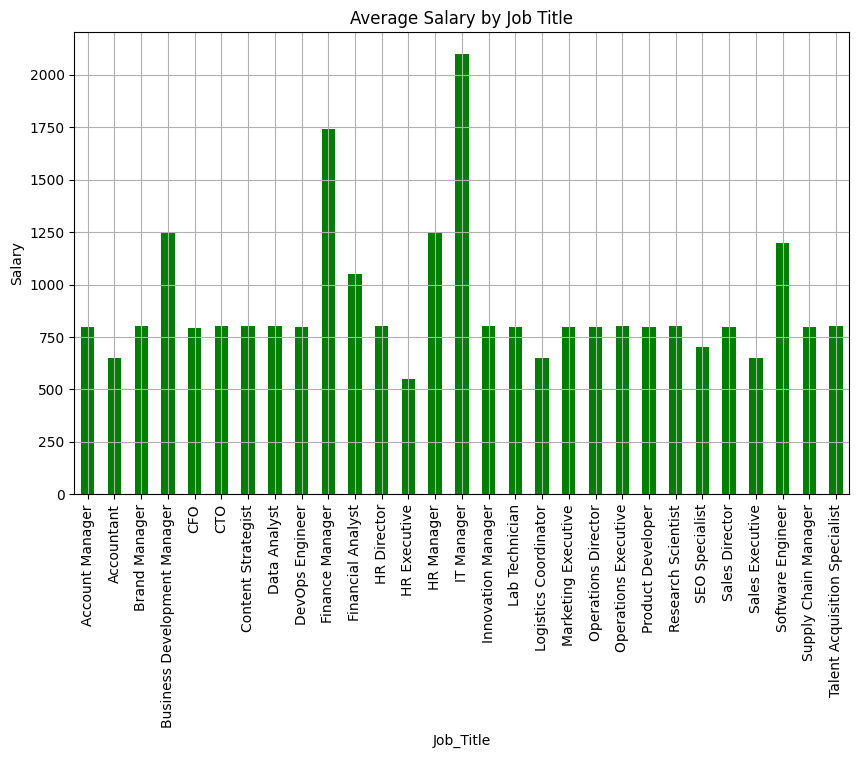

In [31]:
plt.figure(figsize=(10,6))

salary.plot( x = salary.index, y = salary.values, kind = 'bar', color = 'g')

plt.grid(True)
plt.title("Average Salary by Job Title")
plt.ylabel("Salary")

plt.show()


Q.7) What is the average salary in different Departments based on Job Title ?

In [32]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084


In [33]:
dept_job = df.groupby(['Department', 'Job_Title'])['Salary_INR'].mean()/1000

dept_job

Department  Job_Title                    
Finance     Accountant                        650.076482
            CFO                               795.015873
            Finance Manager                  1743.241525
            Financial Analyst                1051.522903
HR          HR Director                       800.694437
            HR Executive                      550.548859
            HR Manager                       1252.401915
            Talent Acquisition Specialist     801.422237
IT          CTO                               801.402754
            Data Analyst                      800.996380
            DevOps Engineer                   799.949184
            IT Manager                       2098.155777
            Software Engineer                1199.260843
Marketing   Brand Manager                     803.127787
            Content Strategist                800.760030
            Marketing Executive               798.780404
            SEO Specialist                    

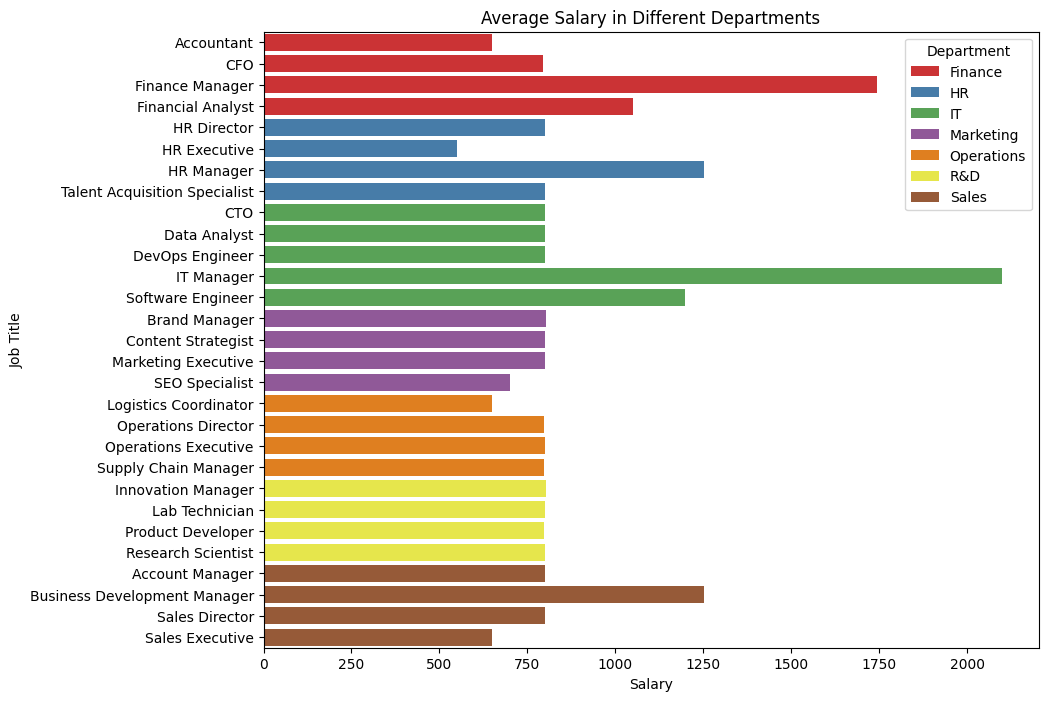

In [34]:
dept_job_df = dept_job.reset_index()
plt.figure(figsize=(10,8))
sns.barplot( y='Job_Title', x='Salary_INR', data=dept_job_df, hue='Department', dodge=False, palette='Set1')
plt.title('Average Salary in Different Departments')
plt.xlabel("Salary")
plt.ylabel("Job Title")
plt.show()


Q.8) How many employees Resigned & Terminated in each department ?

In [35]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084


In [36]:
df.Status.unique()

array(['Resigned', 'Active', 'Terminated', 'Retired'], dtype=object)

In [37]:
df_resigned = df[df["Status"]=='Resigned']
df_resigned

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
8,EMP0000009,Cathy Thompson,Finance,Financial Analyst,2018-05-29,"South Catherine, Belize",4,7,Resigned,Remote,1138452
11,EMP0000012,Kevin Lowe,Sales,Account Manager,2024-07-02,"East Kent, Qatar",3,1,Resigned,On-site,1111759
16,EMP0000017,Robert Martin,Operations,Logistics Coordinator,2025-05-13,"Laurahaven, Afghanistan",3,0,Resigned,On-site,859025
19,EMP0000020,Donald Hoffman,Marketing,Content Strategist,2022-04-01,"South James, New Zealand",3,3,Resigned,On-site,965154
...,...,...,...,...,...,...,...,...,...,...,...
1999976,EMP1999977,Angela Curtis,Operations,Operations Executive,2021-08-07,"East Jeremiahburgh, Rwanda",4,4,Resigned,On-site,602517
1999983,EMP1999984,Joshua Ponce,Sales,Account Manager,2020-05-08,"North Tracey, Venezuela",4,5,Resigned,On-site,547090
1999985,EMP1999986,Aaron Montgomery,Marketing,Marketing Executive,2017-06-03,"Maddenmouth, Belize",5,8,Resigned,Remote,693363
1999986,EMP1999987,Mason Parker,Operations,Operations Executive,2018-02-27,"Joseside, Cameroon",2,7,Resigned,On-site,581507


In [38]:
r_emp = df_resigned.groupby('Department')['Status'].count() # we can use any of column name instead of 'Status'
r_emp

Department
Finance        40238
HR             31736
IT            119852
Marketing      47793
Operations     59397
R&D            19919
Sales          79725
Name: Status, dtype: int64

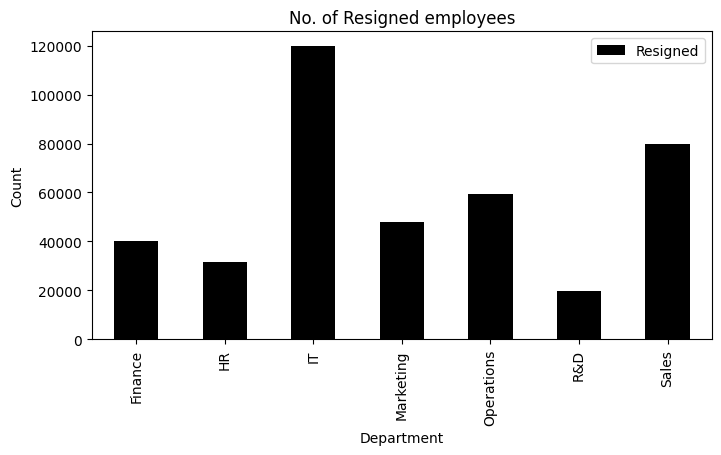

In [39]:
plt.figure(figsize=(8,4))

r_emp.plot( x = r_emp.index, y = r_emp.values , kind = 'bar', color = 'black', legend = True, label = 'Resigned')

plt.title("No. of Resigned employees")
plt.ylabel("Count")

plt.show()

In [40]:
# Now for 'Terminated'
df_terminated = df[df["Status"]=='Terminated']
df_terminated

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
20,EMP0000021,Mr. Billy Rodgers DDS,Marketing,Marketing Executive,2017-10-12,"West Bryanton, Saint Martin",3,7,Terminated,On-site,796532
33,EMP0000034,Steve Carlson,IT,Software Engineer,2020-04-25,"Grahamfurt, Jamaica",5,5,Terminated,On-site,1039192
56,EMP0000057,Claire Martinez,IT,DevOps Engineer,2020-01-17,"Garciaton, Libyan Arab Jamahiriya",5,5,Terminated,Remote,838341
100,EMP0000101,Johnny Shepard,Finance,Accountant,2023-02-02,"North Briannatown, Cuba",4,2,Terminated,On-site,892140
121,EMP0000122,Vanessa Brown,IT,Data Analyst,2017-08-14,"South Teresa, Liechtenstein",3,8,Terminated,On-site,495474
...,...,...,...,...,...,...,...,...,...,...,...
1999912,EMP1999913,Stefanie Valentine,Marketing,Content Strategist,2016-05-04,"New Aaronton, Andorra",4,9,Terminated,Remote,949807
1999936,EMP1999937,Lisa Gordon,Finance,Financial Analyst,2025-02-25,"Baxtermouth, Qatar",5,0,Terminated,On-site,1288980
1999947,EMP1999948,John Johnson,Sales,Sales Executive,2019-11-13,"Maryborough, Nepal",1,5,Terminated,Remote,574391
1999981,EMP1999982,Mindy Campbell,Sales,Account Manager,2018-07-16,"Sharonchester, Belgium",2,7,Terminated,On-site,705933


In [41]:
r_term = df_terminated.groupby('Department')['Status'].count() # we can use any of column name instead of 'Status'
r_term

Department
Finance        9988
HR             7861
IT            29881
Marketing     12044
Operations    14884
R&D            4998
Sales         20214
Name: Status, dtype: int64

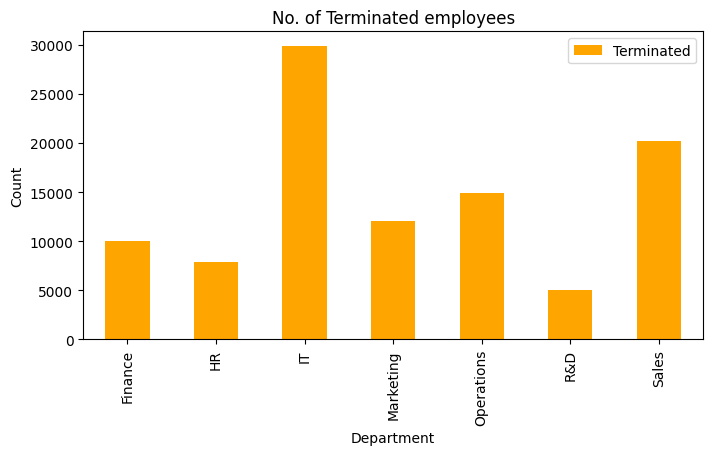

In [42]:
plt.figure(figsize=(8,4))

r_term.plot( x = r_term.index, y = r_term.values , kind = 'bar', color = 'orange', legend = True, label = 'Terminated')

plt.title("No. of Terminated employees")
plt.ylabel("Count")

plt.show()

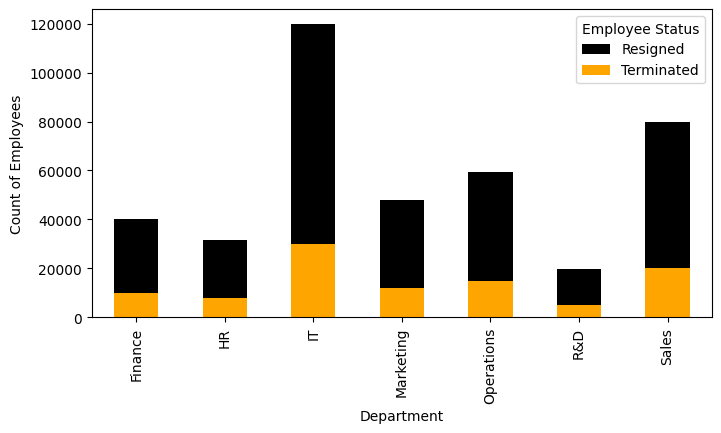

In [43]:
# Combine "Resigned" and "Terminated" graphs
plt.figure(figsize=(8,4))

r_emp.plot( x = r_emp.index, y = r_emp.values , kind = 'bar', color = 'black', legend = True, label = 'Resigned')
r_term.plot( x = r_term.index, y = r_term.values , kind = 'bar', color = 'orange', legend = True, label = 'Terminated')

plt.legend(title= "Employee Status")
plt.ylabel("Count of Employees")
plt.show()

Q.9) How does salary vary with years of experience?

In [44]:
df['Experience_Years'].unique()

array([14,  7,  2,  1,  0,  4,  9,  5,  6,  8,  3, 10, 11, 12, 13, 15])

In [45]:
df.groupby('Experience_Years')['Salary_INR'].mean()

Experience_Years
0     896737.454775
1     895903.759824
2     896755.652313
3     896861.245240
4     897944.573965
5     896484.084828
6     896012.632467
7     895722.673960
8     897148.361090
9     898482.940577
10    895662.027882
11    901452.750112
12    896432.933416
13    898790.197041
14    895610.790251
15    895647.401051
Name: Salary_INR, dtype: float64

Q.10) What is the average performance rating by department?

In [46]:
PR = df.groupby('Department')['Performance_Rating'].mean()
PR

Department
Finance       2.996818
HR            2.995670
IT            2.998216
Marketing     3.004736
Operations    2.996081
R&D           3.001885
Sales         3.006362
Name: Performance_Rating, dtype: float64

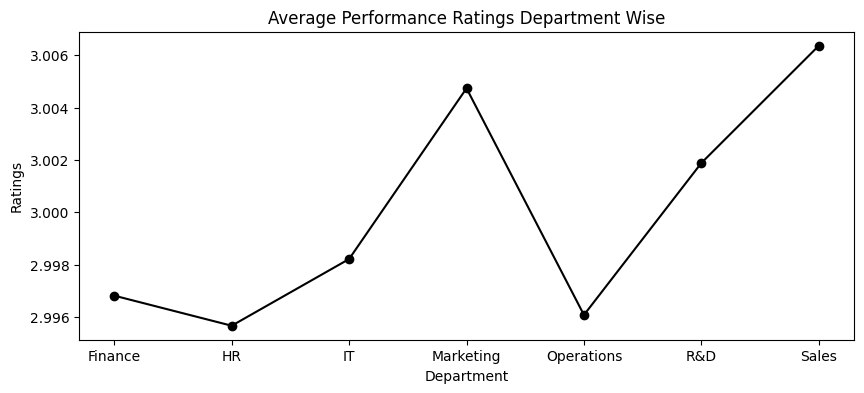

In [47]:
plt.figure(figsize=(10,4))

PR.plot(x = PR.index, y = PR.values, color = 'black', marker='o', markersize=6)

plt.title("Average Performance Ratings Department Wise")
plt.ylabel("Ratings")

plt.show()

Q.11) Which Country have the highest concentration of employees?

In [48]:
df.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [49]:
# Now we have to split country name from the "Location" and make a new column named "Country"
df['Country'] = df['Location'].apply( lambda x : str(x.split(',')[1])) 
# put '1' because we want the values after ',' if we put '0' then it will show the values before the ','

In [50]:
df.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,Antigua and Barbuda
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,Palestinian Territory


In [51]:
df.Country.value_counts()

Country
Congo                     16286
Korea                     16285
Sri Lanka                  8409
Switzerland                8391
British Virgin Islands     8373
                          ...  
Indonesia                  7983
Kazakhstan                 7973
Montenegro                 7972
Bhutan                     7971
Palestinian Territory      7895
Name: count, Length: 243, dtype: int64

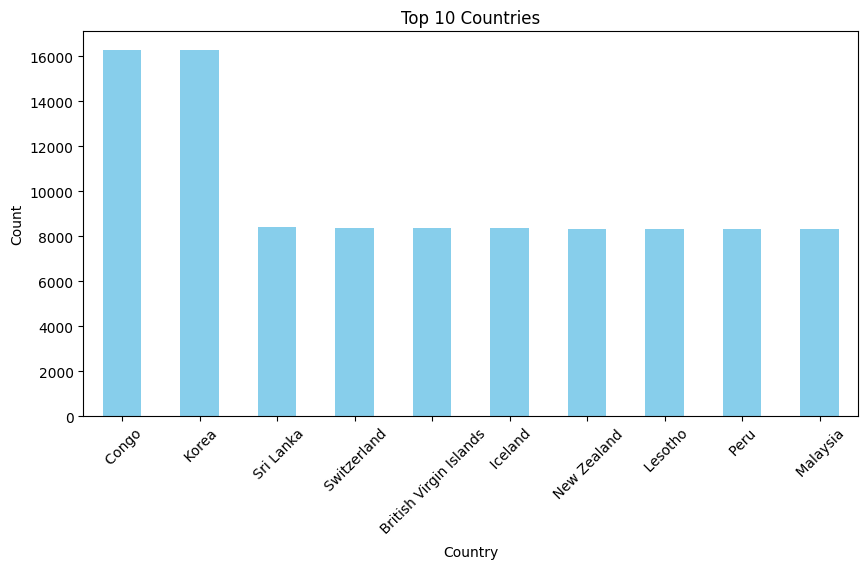

In [52]:
# Top 10 country 
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='skyblue')

plt.title("Top 10 Countries")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Q.12) Is there a correlation between performance rating and salary?

In [53]:
df['Performance_Rating'].corr(df['Salary_INR'])

np.float64(-0.00020919799940916518)

In [54]:
# Alternated Command to show Correlation
corr_matrix = df[['Performance_Rating', 'Salary_INR']].corr()
corr_matrix

,Performance_Rating,Salary_INR
Performance_Rating,1.000000,-0.000209
Salary_INR,-0.000209,1.000000


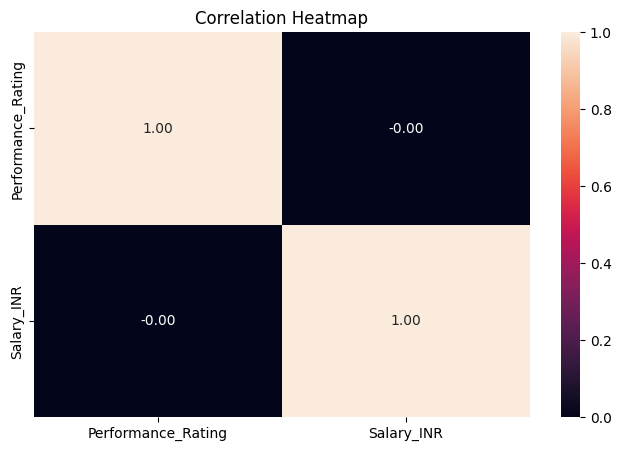

In [55]:
# Showing Coorelation with Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

Q.13) How has the number of hires changed over time (per year)?

In [56]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia


In [57]:
# Now we have to split the year from the "Hire_Date" and create a new column at index 5
df.insert(5, 'Year', df['Hire_Date'].dt.year)

In [58]:
df.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Year,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,2011,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,2018,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,2023,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,2023,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,Antigua and Barbuda
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,2024,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,Palestinian Territory


In [59]:
df.Year.nunique()

16

In [60]:
df.Year.unique()

array([2011, 2018, 2023, 2024, 2021, 2016, 2020, 2015, 2025, 2022, 2017,
       2019, 2014, 2013, 2012, 2010], dtype=int32)

In [61]:
hire = df.groupby('Year')['Employee_ID'].count()
hire

Year
2010     15520
2011     40089
2012     39765
2013     39988
2014     40202
2015     85984
2016    160249
2017    160363
2018    159658
2019    160202
2020    175460
2021    199366
2022    201373
2023    198982
2024    200001
2025    122798
Name: Employee_ID, dtype: int64

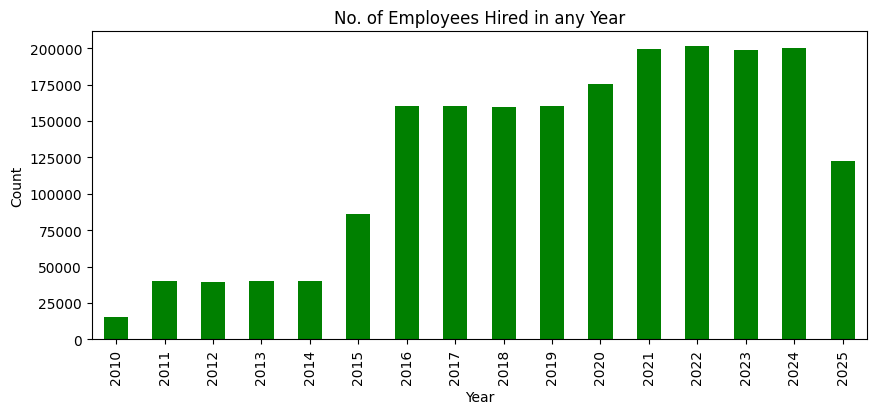

In [62]:
plt.figure(figsize=(10,4))

hire.plot(x = hire.index, y = hire.values, kind = 'bar', color = 'green')

plt.title("No. of Employees Hired in any Year")
plt.ylabel("Count")
plt.show()

Q.14) Compare salaries of Remote vs On-site employees — is there a significant difference?

In [63]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Year,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,2011,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,2018,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,2023,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia


In [64]:
df.groupby('Work_Mode')['Salary_INR'].mean()

Work_Mode
On-site    896835.945792
Remote     896965.326373
Name: Salary_INR, dtype: float64

Q.15) Find the top 3 employees with the highest salary in each department.

In [65]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Year,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,2011,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,2018,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,2023,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia


In [66]:
top3_each_dept = (df.sort_values(['Department', 'Salary_INR'], ascending=[True, False]).groupby('Department').head(3))

top3_each_dept[['Department', 'Full_Name', 'Job_Title', 'Salary_INR']].head(21) 
# there are 7 departments so we want to see head(21)


,Department,Full_Name,Job_Title,Salary_INR
888712,Finance,Christopher Sloan,Finance Manager,2499958
695808,Finance,Todd Rodgers,Finance Manager,2499929
459273,Finance,Angela Payne,Finance Manager,2499925
223845,HR,Ethan Jones,HR Manager,1799839
1068270,HR,Austin Hall,HR Manager,1799791
1541972,HR,Daniel Wilson,HR Manager,1799769
1697605,IT,Kathryn Owens,IT Manager,2999976
1284141,IT,Robert Bowman,IT Manager,2999973
1912378,IT,Christina Delgado,IT Manager,2999944
1268998,Marketing,Shannon Fox,Marketing Executive,1199997


In [67]:
# or we can also do this in another way
# top_3 = df.groupby('Department').apply(lambda x:x.nlargest(3, "Salary_INR"))

Q.16) Identify departments with the highest attrition rate (Resigned %).

In [68]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Year,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,2011,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,2018,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,2023,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia


In [69]:
dept_counts = df.groupby('Department')['Status'].agg(total_emp = 'count', resigned = lambda x: (x == 'Resigned').sum())
dept_counts

,total_emp,resigned
Department,,
Finance,199873,40238
HR,159119,31736
IT,601042,119852
Marketing,240081,47793
Operations,300095,59397
R&D,99759,19919
Sales,400031,79725


In [70]:
# Calculate resigned rate and create a new column named 'resigned_rate_%'

dept_counts['resigned_rate_%'] = (dept_counts['resigned'] / dept_counts['total_emp']) * 100
dept_counts

,total_emp,resigned,resigned_rate_%
Department,,,
Finance,199873,40238,20.131784
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732
R&D,99759,19919,19.967121
Sales,400031,79725,19.929705


In [71]:
# Sort by attrition rate (highest first)
dept_counts.sort_values("resigned_rate_%", ascending = False)

,total_emp,resigned,resigned_rate_%
Department,,,
Finance,199873,40238,20.131784
R&D,99759,19919,19.967121
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Sales,400031,79725,19.929705
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732


Overall Summary
------------------------------------------

Dataset: 2M employees, 11 columns (Employee_ID, Name, Department, Job_Title, Hire_Date, Location, Performance_Rating, Experience_Years, Status, Work_Mode, Salary_INR).

Employee Status: ~70% Active, ~20% Resigned, ~5% Retired, ~5% Terminated → high voluntary attrition.

Work Mode: ~60% On-site, ~40% Remote → significant remote workforce presence.

Department Size: IT (largest), then Sales & Operations → IT is the company’s backbone.

Job Titles: Software Engineer, Sales Executive, Operations Executive are the most common roles.

Average Salary: IT highest (≈ ₹1.13M), others around ₹0.75–0.80M → IT attracts premium pay.

Top Salaries: Department Managers earn 2–3× more than average employees.

Attrition Counts: Highest absolute resignations in IT, but attrition rate ~20% across all departments (almost equal).

Salary vs Experience: Almost flat → no major salary growth with more experience.

Performance Rating: Average ≈ 3 for all departments → little differentiation in evaluation.

Performance vs Salary: Correlation ≈ 0 → pay not linked to performance.

Hiring Trend: Sharp growth from 2016 to 2024 → expansion period.

Remote vs On-site Salary: Nearly identical → fair pay for remote work.